In [833]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [834]:
df = pd.read_csv("/Users/mdnaif/Desktop/Winter_Arc_ML/Day_02_KNN/heart_cleveland_upload.csv")

### Understanding the Data

In [835]:
print(df.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [836]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

There are 13 attributes

*age* : age in years

*sex* : sex (1 = male; 0 = female)

*cp* : chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

*trestbps* : resting blood pressure (in mm Hg on admission to the hospital)

*chol* : serum cholestoral in mg/dl

*fbs* : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

*restecg* : resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*thalach* : maximum heart rate achieved

*exang* : exercise induced angina (1 = yes; 0 = no)

*oldpeak* = ST depression induced by exercise relative to rest

*slope* : the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

*ca* : number of major vessels (0-3) colored by flourosopy

*thal* : 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

*condition* : 0 = no disease, 1 = disease


In [837]:
print(df.shape , "\n", df.size)

(297, 14) 
 4158


In [838]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [839]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Exploratory Data Analysis

In [840]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal'),
  Text(13, 0, 'condition')])

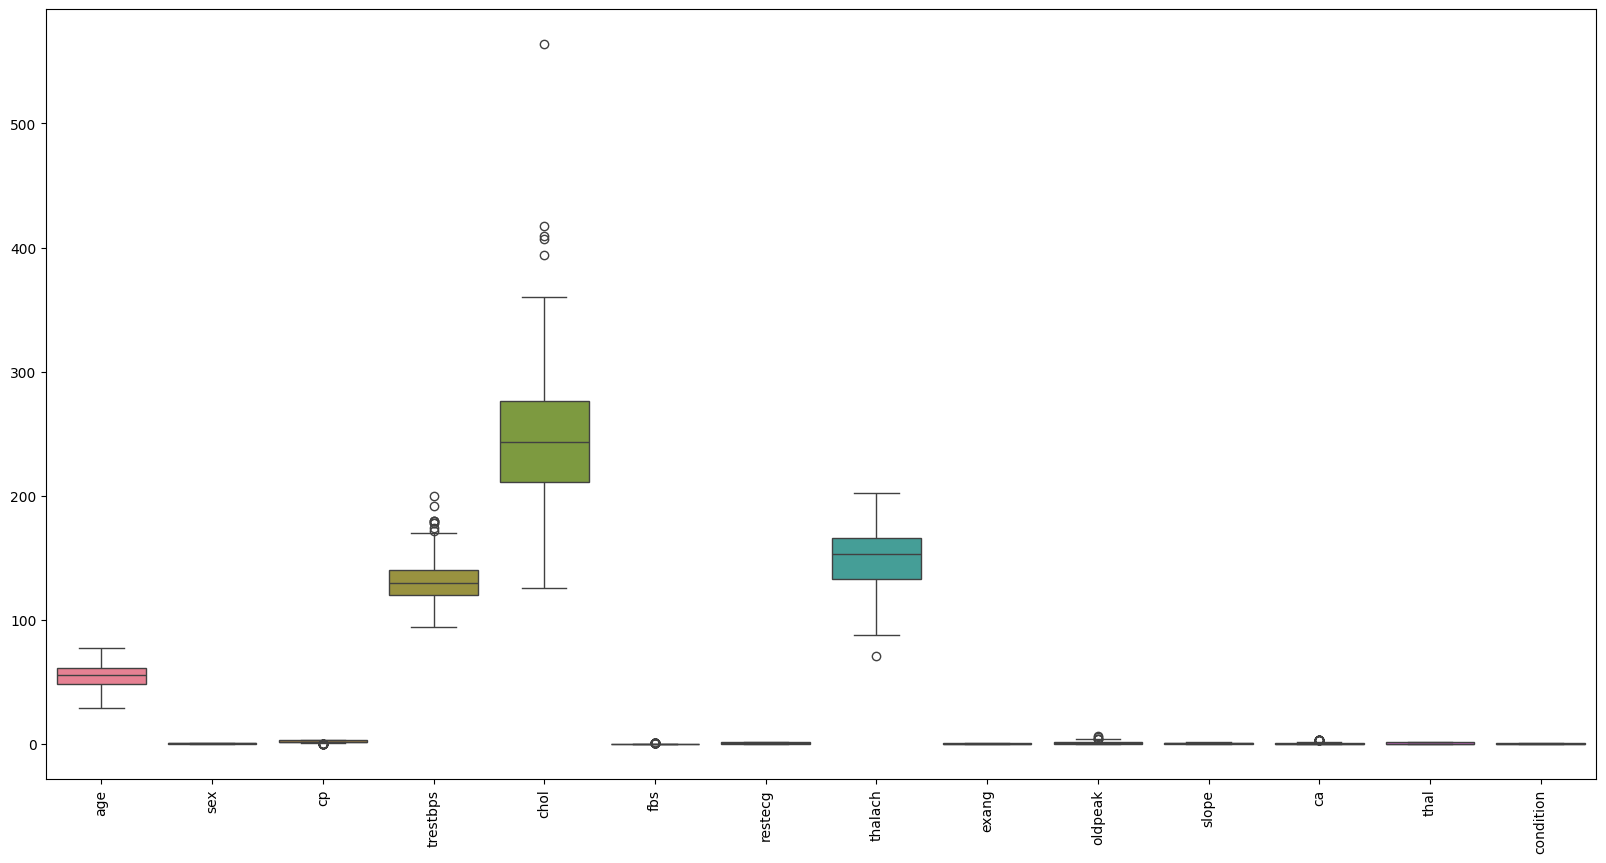

In [841]:
plt.figure(figsize= (20,10))
sns.boxplot(data=df)
plt.xticks(rotation = 90)

In [842]:
df.skew().sort_values(ascending=False)

fbs          2.029240
oldpeak      1.247131
ca           1.179548
chol         1.118096
exang        0.743256
trestbps     0.700070
slope        0.510444
thal         0.335707
condition    0.156138
restecg      0.006768
age         -0.219775
thalach     -0.536540
sex         -0.759727
cp          -0.844412
dtype: float64

In [843]:
df.corr()["condition"].sort_values(ascending=False)

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64

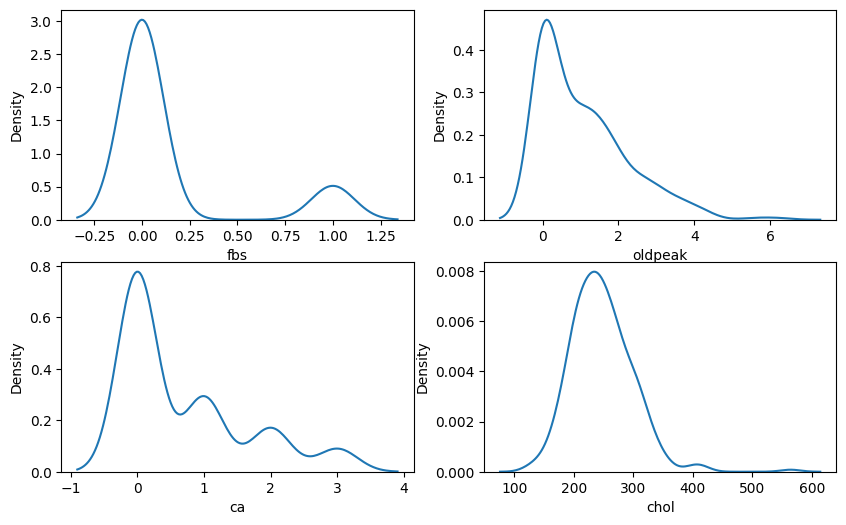

In [844]:
fig, ax = plt.subplots(2,2, figsize = (10,6))
sns.kdeplot(df["fbs"], ax=ax[0,0])
sns.kdeplot(df["oldpeak"], ax=ax[0,1])
sns.kdeplot(df["ca"], ax=ax[1,0])
sns.kdeplot(df["chol"], ax=ax[1,1])
plt.show()


### Preprocessing

In [845]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [846]:
numeric_columns = ["age","trestbps","thalach","chol","oldpeak"]
cat_columns = ["sex","cp","restecg","exang","slope","ca","thal"]

X = df[numeric_columns + cat_columns]
y = df["condition"]
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [847]:
preprocessor = ColumnTransformer([
    ("scaled",StandardScaler(),numeric_columns),
    ("ohe",OneHotEncoder(),cat_columns)
])

### Model Training

In [848]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=6, weights = "distance", p=2, metric="minkowski",))

pipeline_knn.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaled', ...), ('ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [849]:
print(pipeline_knn.named_steps)

{'columntransformer': ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                 ['age', 'trestbps', 'thalach', 'chol',
                                  'oldpeak']),
                                ('ohe', OneHotEncoder(),
                                 ['sex', 'cp', 'restecg', 'exang', 'slope',
                                  'ca', 'thal'])]), 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=6, weights='distance')}


In [850]:
param_grid_knn = {
    "kneighborsclassifier__n_neighbors" : list(range(3,39)),
    "kneighborsclassifier__weights" : ["uniform","distance"],
    "kneighborsclassifier__p" : [1,2],
    "kneighborsclassifier__metric" : ["minkowski","euclidean","manhattan"]
    }

grid_knn = GridSearchCV(pipeline_knn,param_grid_knn,cv=10,scoring="accuracy",n_jobs=-1)
grid_knn.fit(X_train,y_train)

print("Best n_neighbor = ", grid_knn.best_params_)
print("Best CV Accuracy = ", grid_knn.best_score_)

Best n_neighbor =  {'kneighborsclassifier__metric': 'minkowski', 'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Best CV Accuracy =  0.8983695652173914


### Model Evaluation

In [851]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

y_pred_knn = pipeline_knn.predict(X_test)

print(f"Accuracy : \n {accuracy_score(y_test,y_pred_knn)}")
print(f"Confusion matrix : \n {confusion_matrix(y_test,y_pred_knn)}")
print(f"Classification report : \n {classification_report(y_test,y_pred_knn)}")

Accuracy : 
 0.7333333333333333
Confusion matrix : 
 [[23  9]
 [ 7 21]]
Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



### Logistc Regression

In [852]:
from sklearn.linear_model import LogisticRegression

pipeline_logres = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=5000, C=0.1,penalty="l2",solver="lbfgs")
)

pipeline_logres.fit(X_train,y_train)

y_pred_logres = pipeline_logres.predict(X_test)


In [853]:
param_grid_logres = [
    # l2 penalty
    {"logisticregression__penalty": ["l2"],
     "logisticregression__solver": ["lbfgs", "liblinear"],
     "logisticregression__C": [0.01, 0.1, 1, 10, 100]},
    
    # l1 penalty
    {"logisticregression__penalty": ["l1"],
     "logisticregression__solver": ["liblinear", "saga"],
     "logisticregression__C": [0.01, 0.1, 1, 10, 100]},
]

grid_logres = GridSearchCV(pipeline_logres,param_grid_logres,cv=10,scoring="accuracy",n_jobs=-1, error_score='raise')
grid_logres.fit(X_train,y_train)

print("Best Param = ", grid_logres.best_params_)
print("Best CV Accuracy = ", grid_logres.best_score_)

Best Param =  {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best CV Accuracy =  0.8769927536231885


In [854]:
print(f"Accuracy : \n {accuracy_score(y_test,y_pred_logres)}")
print(f"Confusion matrix : \n {confusion_matrix(y_test,y_pred_logres)}")
print(f"Classification report : \n {classification_report(y_test,y_pred_logres)}")

Accuracy : 
 0.7666666666666667
Confusion matrix : 
 [[24  8]
 [ 6 22]]
Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



### Comparing KNN vs Logistic Regression

In [855]:
print("KNN Classification : ", accuracy_score(y_test,y_pred_knn))
print("Logistic Regression Classification : ",accuracy_score(y_test,y_pred_logres))

KNN Classification :  0.7333333333333333
Logistic Regression Classification :  0.7666666666666667
